<a href="https://colab.research.google.com/github/undefined-ankit/teleco_churn_prediction/blob/main/telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/My Drive/datasets/Customer-Churn.csv")

In [ ]:
data.shape

(7043, 21)

## **Data Cleaning**

In [ ]:
data.shape

(7043, 21)

In [ ]:
# customerID does not require for our prediction
data.drop('customerID',axis='columns',inplace=True)

In [ ]:
def unique_values(data):
  ''' function for printing the unique values in a column
  '''
  for col in data:
    print(f'{col}: {data[col].unique()}')

In [ ]:
#total cherges are object type we have to convert it into numeric type
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]
# we have to drop null values from datasets
data1 = data[data['TotalCharges']!=' ']

In [ ]:
data1['TotalCharges'] = pd.to_numeric(data1.TotalCharges) # we have converted TotalCharges type from str to float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
unique_values(data1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [ ]:
# some replacement required like
data1.replace('No phone service','No',inplace=True)
data1.replace('No internet service','No',inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
unique_values(data1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [ ]:
#model uses numeric values for processing so we will convert yes/no by 1/0
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','PaperlessBilling','Churn']
for i in yes_no_cols:
  data1.replace({'Yes':1,'No':0},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
unique_values(data1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
#replace male/female by 1/0
data1.gender.replace({'Female':0,'Male':1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#we have to convert categorical values to numerical columns by one-hot encoding for processing.
data2 = pd.get_dummies(data=data1,columns= ['InternetService','Contract','PaymentMethod'])


**Now our data is cleaned and ready to process but some columns do not have values in same range. So, we need to scale those value for better fit.**

In [ ]:
data2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3459,0,0,1,1,30,1,1,0,0,0,0,0,0,1,25.10,789.55,0,1,0,0,0,0,1,0,0,0,1
3595,0,1,0,0,2,1,0,0,0,0,0,0,0,1,70.20,115.95,1,0,0,1,1,0,0,1,0,0,0
2623,0,0,0,1,2,1,1,1,0,0,0,0,0,0,80.55,188.10,0,0,0,1,1,0,0,0,1,0,0
4194,0,0,1,0,71,1,1,0,0,0,0,0,0,1,25.95,1801.90,0,1,0,0,0,0,1,0,1,0,0
497,0,0,1,0,70,1,0,0,0,0,0,0,0,0,19.80,1397.65,0,1,0,0,0,0,1,1,0,0,0


In [ ]:
#We have to scale Tenure, TotalCharge and MonthlyCharges
cols_to_scale = ["tenure",'TotalCharges','MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])


In [ ]:
data2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3888,0,0,0,0,0.000000,1,0,0,0,0,0,0,1,0,0.615920,0.007079,1,0,0,1,1,0,0,0,1,0,0
1986,0,0,1,1,0.957746,1,1,0,1,0,1,0,1,1,0.746766,0.736124,0,0,0,1,0,0,1,1,0,0,0


## **Model Training**

In [ ]:
#x_data is our features for model and y_data is target
x_data = data2.drop('Churn',axis='columns')
y_data= data2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 5)

In [ ]:
x_train.shape

(5625, 26)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(13,input_shape=(26,),activation='relu'),
                          keras.layers.Dense(7,activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs =10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7641
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.7918
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.7950
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.7998
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7988
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8016
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8059
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8066
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8062
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8075

In [ ]:
#In 10 epochs our accuracy is 80%. we will try to improve it via increasing the epochs
model = keras.Sequential([
                          keras.layers.Dense(13,input_shape=(26,),activation='relu'),
                          keras.layers.Dense(7,activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs =100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7195
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7877
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.7970
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.7982
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8036
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8039
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accura

In [ ]:
#we have seen after 50 epochs our accuracy is 81.35% and after 100 the accuracy is 81.7%. 
#So, after a point, always increasing the epochs do not improve accuracy.
#We try with some other combinations of layers 
model = keras.Sequential([
                          keras.layers.Dense(13,input_shape=(26,),activation='relu'),
                          keras.layers.Dense(7,activation='relu'),
                          keras.layers.Dense(4,activation='relu'),
                          
                          keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs =50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.5607 - accuracy: 0.7294
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7860
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7972
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8007
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8020
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8050
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8064
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8076
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8073
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8078

In [ ]:
#we have seen after 50 epochs our accuracy is approx 81.8%.
#So,every time increasing the stack of hidden layers do not improve accuracy.
model = keras.Sequential([
                          keras.layers.Dense(13,input_shape=(26,),activation='relu'),
                          keras.layers.Dense(7,activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs =50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.6787 - accuracy: 0.5892
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7851
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7996
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8037
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8052
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8032
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8050
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8108
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8101
Epoch 10/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8037

In [ ]:
yp = model.predict(x_test)# it will returns the value in range 0.0 to 1.0
yp[:4]

array([[0.22807518],
       [0.32232693],
       [0.01741427],
       [0.7223139 ]], dtype=float32)

In [ ]:
#if value is greater  than 0.5 that it belongs to 1 otherwise 0.
y_pred =[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
for i,j in zip(y_test[:5],y_pred[:5]):
  print(f' true lable:{i} and predicted lable:{j} ')

 true lable:0 and predicted lable:0 
 true lable:0 and predicted lable:0 
 true lable:1 and predicted lable:0 
 true lable:1 and predicted lable:1 
 true lable:1 and predicted lable:1 


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



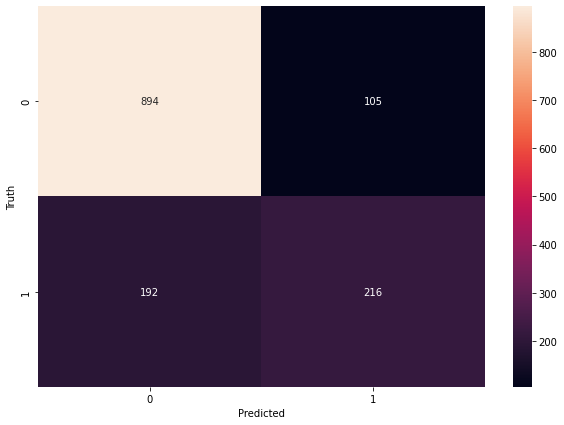

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()